Import

In [1]:
# Load all the imports in this section
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
import pickle

np.set_printoptions(threshold=np.nan)

Data Loading

In [2]:
#Load all the datasets in this section and print out the shape == (rows, columns)

Indian_Female_Names = pd.read_csv('Indian-Female-Names.csv')
Indian_Male_Names = pd.read_csv('Indian-Male-Names.csv')

Hispanic_Female_Names = pd.read_csv('Hispanic-Female-Names.csv')
Hispanic_Male_Names = pd.read_csv('Hispanic-Male-Names.csv')

White_Female_Names = pd.read_csv('White-Female-Names.csv')
White_Male_Names = pd.read_csv('White-Male-Names.csv')

Black_Male_Names = pd.read_csv('Black-Male-Names.csv')
Black_Female_Names = pd.read_csv('Black-Female-Names.csv')

print("Females", Indian_Female_Names.shape, Hispanic_Female_Names.shape, White_Female_Names.shape, Black_Female_Names.shape)
print("Males", Indian_Male_Names.shape, Hispanic_Male_Names.shape, White_Male_Names.shape, Black_Male_Names.shape)

Females (15382, 3) (217, 4) (4600, 4) (2438, 4)
Males (14845, 3) (4166, 4) (44048, 4) (35081, 4)


Data Cleaning

In [3]:
# To concatenate all the datasets, check the column names. If the column names are not same then it won't concatenate properly.

print(Indian_Female_Names.columns)
print(Indian_Male_Names.columns)
print(Hispanic_Female_Names.columns)
print(Hispanic_Male_Names.columns)
print(White_Female_Names.columns)
print(White_Male_Names.columns)
print(Black_Female_Names.columns)
print(Black_Male_Names.columns)

# Indian names datasets don't have last_name. So, during the training all the entries from Indian dataset which doesn't have 
# last_name will be dropped. So, one of the possible solutions is to split the only name column in Indian datasets into first_name
# and last_name. 

# e.g. code ->
#Indian_Female_Names['first_name'], Indian_Female_Names['last_name'] = Indian_Female_Names['name'].str.split(' ', 1).str
#Indian_Female_Names.head(10)

Index(['name', 'gender', 'race'], dtype='object')
Index(['name', 'gender', 'race'], dtype='object')
Index(['last name', ' first name', 'gender', 'race'], dtype='object')
Index(['last name', 'first name', 'gender', 'race'], dtype='object')
Index(['last name', ' first name', 'gender', 'race'], dtype='object')
Index(['last name', ' first name', 'gender', 'race'], dtype='object')
Index(['last name', ' first name', 'gender', 'race'], dtype='object')
Index(['last name', 'first name', 'gender', 'race'], dtype='object')


In [4]:
# Renmae the column names to help in the concatenation.

Indian_Female_Names.columns = ['first_name', 'gender', 'race']
Indian_Male_Names.columns = ['first_name', 'gender', 'race']
Hispanic_Female_Names.columns = ['last_name', 'first_name', 'gender', 'race']
Hispanic_Male_Names.columns = ['last_name', 'first_name', 'gender', 'race']
White_Female_Names.columns = ['last_name', 'first_name', 'gender', 'race']
White_Male_Names.columns = ['last_name', 'first_name', 'gender', 'race']
Black_Female_Names.columns = ['last_name', 'first_name', 'gender', 'race']
Black_Male_Names.columns = ['last_name', 'first_name', 'gender', 'race']

In [5]:
# Check the column names now

print(Indian_Female_Names.columns)
print(Indian_Male_Names.columns)
print(Hispanic_Female_Names.columns)
print(Hispanic_Male_Names.columns)
print(White_Female_Names.columns)
print(White_Male_Names.columns)
print(Black_Female_Names.columns)
print(Black_Male_Names.columns)

Index(['first_name', 'gender', 'race'], dtype='object')
Index(['first_name', 'gender', 'race'], dtype='object')
Index(['last_name', 'first_name', 'gender', 'race'], dtype='object')
Index(['last_name', 'first_name', 'gender', 'race'], dtype='object')
Index(['last_name', 'first_name', 'gender', 'race'], dtype='object')
Index(['last_name', 'first_name', 'gender', 'race'], dtype='object')
Index(['last_name', 'first_name', 'gender', 'race'], dtype='object')
Index(['last_name', 'first_name', 'gender', 'race'], dtype='object')


In [6]:
# Concatenate all the datasets in order to visualize the distributions, figure out any outliers etc.

all_data_vis = pd.concat([Indian_Female_Names, Indian_Male_Names, Hispanic_Female_Names, Hispanic_Male_Names,
                      White_Female_Names, White_Male_Names, Black_Female_Names, Black_Male_Names], axis=0)
print(all_data_vis.shape)
all_data_vis.columns

(120777, 4)


Index(['first_name', 'gender', 'last_name', 'race'], dtype='object')

Data Visualization

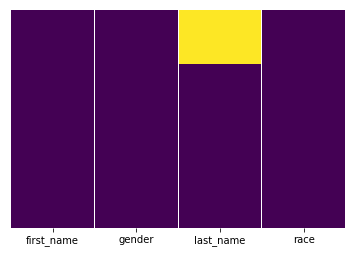

In [7]:
#Heat map to see what all data points are we missing. 
#last name is missing in the data. rest all is present

sns.heatmap(all_data_vis.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Yellow color means the values are NaN. This is from the Indian dataset.

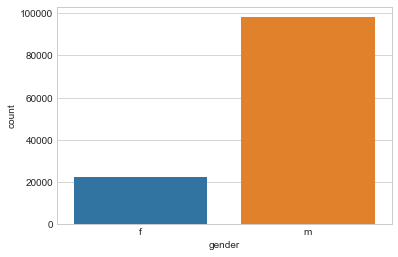

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='gender',data=all_data_vis)

#proportion of male is close to 4 times that of female 

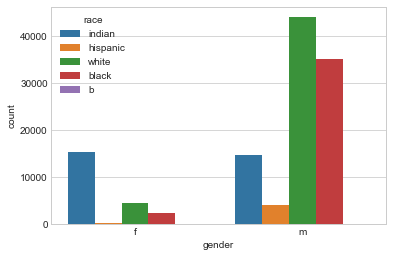

In [9]:
#plots of how gender proportion is divided between different races 

sns.countplot(x='gender',hue ='race',data=all_data_vis)

Data Preprocessing/Feature generation

In [10]:
# Based on the above visualizations, it is clear that normal random splitting of the concatenated dataset will not work.
# Random splitting must to be done for each dataset based on gender, and race followed by concatenation.
# Only then the final X_train and X_test dataset will have proportionate entries based on gender, and race.

print(Indian_Female_Names.shape,
    Indian_Male_Names.shape,
    Hispanic_Female_Names.shape,
    Hispanic_Male_Names.shape,
    White_Female_Names.shape,
    White_Male_Names.shape,
    Black_Female_Names.shape,
    Black_Male_Names.shape)

# Split each dataset into 70:30 ratio for training and testing

X_train_Indian_Female, X_test_Indian_Female = train_test_split(Indian_Female_Names, test_size=0.30)
print("Shape of train and test dataset (race = Indian (Female))  ", X_train_Indian_Female.shape, X_test_Indian_Female.shape)

X_train_Indian_Male, X_test_Indian_Male = train_test_split(Indian_Male_Names, test_size=0.30)
print("Shape of train and test dataset (race = Indian (Male))    ", X_train_Indian_Male.shape, X_test_Indian_Male.shape)

X_train_Hispanic_Female, X_test_Hispanic_Female = train_test_split(Hispanic_Female_Names, test_size=0.30)
print("Shape of train and test dataset (race = Hispanic (Female))", X_train_Hispanic_Female.shape, X_test_Hispanic_Female.shape)

X_train_Hispanic_Male, X_test_Hispanic_Male = train_test_split(Hispanic_Male_Names, test_size=0.30)
print("Shape of train and test dataset (race = Hispanic (Male))  ", X_train_Hispanic_Male.shape, X_test_Hispanic_Male.shape)

X_train_White_Female, X_test_White_Female = train_test_split(White_Female_Names, test_size=0.30)
print("Shape of train and test dataset (race = White (Female))   ", X_train_White_Female.shape, X_test_White_Female.shape)

X_train_White_Male, X_test_White_Male = train_test_split(White_Male_Names, test_size=0.30)
print("Shape of train and test dataset (race = White (Male))     ", X_train_White_Male.shape, X_test_White_Male.shape)

X_train_Black_Female, X_test_Black_Female = train_test_split(Black_Female_Names, test_size=0.30)
print("Shape of train and test dataset (race = Black (Female))   ", X_train_Black_Female.shape, X_test_Black_Female.shape)

X_train_Black_Male, X_test_Black_Male = train_test_split(Black_Male_Names, test_size=0.30)
print("Shape of train and test dataset (race = Black (Male))     ", X_train_Black_Male.shape, X_test_Black_Male.shape)

(15382, 3) (14845, 3) (217, 4) (4166, 4) (4600, 4) (44048, 4) (2438, 4) (35081, 4)
Shape of train and test dataset (race = Indian (Female))   (10767, 3) (4615, 3)
Shape of train and test dataset (race = Indian (Male))     (10391, 3) (4454, 3)
Shape of train and test dataset (race = Hispanic (Female)) (151, 4) (66, 4)
Shape of train and test dataset (race = Hispanic (Male))   (2916, 4) (1250, 4)
Shape of train and test dataset (race = White (Female))    (3220, 4) (1380, 4)
Shape of train and test dataset (race = White (Male))      (30833, 4) (13215, 4)
Shape of train and test dataset (race = Black (Female))    (1706, 4) (732, 4)
Shape of train and test dataset (race = Black (Male))      (24556, 4) (10525, 4)


In [11]:
# Concatenate the training and test datasets from the previous cell.

X_train_all = pd.concat([X_train_Indian_Female, X_train_Indian_Male, X_train_Hispanic_Female, X_train_Hispanic_Male,
                      X_train_White_Female, X_train_White_Male, X_train_Black_Female, X_train_Black_Male], axis=0)
print("Overall shape of training dataset", X_train_all.shape)

X_test_all = pd.concat([X_test_Indian_Female, X_test_Indian_Male, X_test_Hispanic_Female, X_test_Hispanic_Male,
                      X_test_White_Female, X_test_White_Male, X_test_Black_Female, X_test_Black_Male], axis=0)
print("Overall shape of training dataset", X_test_all.shape)

# This shows the count of Male and Female entries.
print("Distribution of Males and females in training and test dataset -> ")
print(X_train_all['gender'].value_counts())
print(X_test_all['gender'].value_counts())

# Concatenating X_train and X_test here to ease the process of data preprocessing.
all_data = pd.concat([X_train_all, X_test_all], axis=0)
print("Overall size of the data", all_data.shape)
all_data.head(20)

Overall shape of training dataset (84540, 4)
Overall shape of training dataset (36237, 4)
Distribution of Males and females in training and test dataset -> 
m    68696
f    15844
Name: gender, dtype: int64
m    29444
f     6793
Name: gender, dtype: int64
Overall size of the data (120777, 4)


,first_name,gender,last_name,race
345,monika,f,NaN,indian
2352,priya kumari,f,NaN,indian
2199,reemi sarkar,f,NaN,indian
4623,komal,f,NaN,indian
5520,sunita devi,f,NaN,indian
9107,beena mandal,f,NaN,indian
7077,smt. pushplata,f,NaN,indian
5066,sonia,f,NaN,indian
11369,parmeshwari,f,NaN,indian
2281,rita rani,f,NaN,indian


In [12]:
# Data preprocessing step ->

# Found this entry by manual checking, changing race to black 
all_data['race'][all_data['race']=="b"] = 'black'

#changing gender as binary and then categorical 
all_data['gender'][all_data['gender'] == 'f'] = 1
all_data['gender'][all_data['gender'] == 'm'] = 0
all_data['gender'] = all_data['gender'].astype('category')

#changing race as categorical 
all_data['race'] = all_data['race'].astype('category')

#changing first name to string 
all_data['first_name'] = all_data['first_name'].astype('str')
all_data['last_name'] = all_data['last_name'].astype('str')

print(all_data.dtypes)

# Pandas wasn't picking up "nan" entries in last_name in .isnull() call, so, the following steps are required to fix it ->
all_data.loc[all_data['first_name'] == 'nan','first_name'] = np.nan
all_data.loc[all_data['last_name'] == 'nan','last_name'] = np.nan
all_data.loc[all_data['gender'] == 'nan','gender'] = np.nan
all_data.loc[all_data['race'] == 'nan','race'] = np.nan

# Convert first_name and last_name to lower cases.
all_data['first_name'] = all_data['first_name'].str.lower()
all_data['last_name'] = all_data['last_name'].str.lower()

# Names have spaces, remove all the spaces.
all_data['first_name'] = all_data['first_name'].str.replace('\s+', '')
all_data['last_name'] = all_data['last_name'].str.replace('\s+', '')

# Dropping race since from the email, it wasn't clear if "race" is going to be a part of the input in deployment
all_data = all_data.drop(['race'], axis=1)
X_train_all = X_train_all.drop(['race'], axis=1)
X_test_all = X_test_all.drop(['race'], axis=1)

all_data.head(10)

first_name      object
gender        category
last_name       object
race          category
dtype: object


,first_name,gender,last_name
345,monika,1,NaN
2352,priyakumari,1,NaN
2199,reemisarkar,1,NaN
4623,komal,1,NaN
5520,sunitadevi,1,NaN
9107,beenamandal,1,NaN
7077,smt.pushplata,1,NaN
5066,sonia,1,NaN
11369,parmeshwari,1,NaN
2281,ritarani,1,NaN


In [13]:
# Checkout the summary 
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120777 entries, 345 to 5797
Data columns (total 3 columns):
first_name    120722 non-null object
gender        120777 non-null category
last_name     90547 non-null object
dtypes: category(1), object(2)
memory usage: 2.9+ MB


In [14]:
# One of the possible feature generation steps if "race" was a feature to be used.
race = pd.get_dummies(all_data_vis['race'],drop_first=True)
race

,black,hispanic,indian,white
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0


In [15]:
# Generate features here 
# First letter of the first name
# First two letters of the first name
# First three letters of the first name
# Last letter of the last name
# Last two letters of the last name
# Last three letters of the last name
# Length of the first name and the last name.

all_data['f1'] = all_data['first_name'].str[:1]
all_data['f2'] = all_data['first_name'].str[0:2]
all_data['f3'] = all_data['first_name'].str[0:3]
all_data['l1'] = all_data['last_name'].str[-1]
all_data['l2'] = all_data['last_name'].str[-2:]
all_data['l3'] = all_data['last_name'].str[-3:]
all_data['flen']= all_data['first_name'].str.len()
all_data['llen']= all_data['last_name'].str.len()
print(all_data.columns)
all_data.head(10)

Index(['first_name', 'gender', 'last_name', 'f1', 'f2', 'f3', 'l1', 'l2', 'l3',
       'flen', 'llen'],
      dtype='object')


,first_name,gender,last_name,f1,f2,f3,l1,l2,l3,flen,llen
345,monika,1,NaN,m,mo,mon,NaN,NaN,NaN,6.0,NaN
2352,priyakumari,1,NaN,p,pr,pri,NaN,NaN,NaN,11.0,NaN
2199,reemisarkar,1,NaN,r,re,ree,NaN,NaN,NaN,11.0,NaN
4623,komal,1,NaN,k,ko,kom,NaN,NaN,NaN,5.0,NaN
5520,sunitadevi,1,NaN,s,su,sun,NaN,NaN,NaN,10.0,NaN
9107,beenamandal,1,NaN,b,be,bee,NaN,NaN,NaN,11.0,NaN
7077,smt.pushplata,1,NaN,s,sm,smt,NaN,NaN,NaN,13.0,NaN
5066,sonia,1,NaN,s,so,son,NaN,NaN,NaN,5.0,NaN
11369,parmeshwari,1,NaN,p,pa,par,NaN,NaN,NaN,11.0,NaN
2281,ritarani,1,NaN,r,ri,rit,NaN,NaN,NaN,8.0,NaN


In [16]:
# @TODO - Data cleaning steps -
# remove special characters
        
# Here, dropping NaN values. Sklearn models cannot process NaN values.
print("Before Shape of X_train", X_train_all.shape)
X_train_all = X_train_all.dropna()
print("After Shape of X_train", X_train_all.shape)

print("Before Shape of X_test", X_test_all.shape)
X_test_all = X_test_all.dropna()
print("After Shape of X_test", X_test_all.shape)

print("Before Shape of all_data", all_data.shape) 
all_data = all_data.dropna()
print("After Shape of all_data", all_data.shape) 

print("Checkout the gender distribution in final train and test dataset -> ")
print(X_train_all['gender'].value_counts())
print(X_test_all['gender'].value_counts())

# Get the input and output separate
X = all_data.drop('gender', axis=1)
y = all_data['gender']

X_train = X[:X_train_all.shape[0]]
y_train = y[:X_train_all.shape[0]]
y_train = y_train.astype('float')

X_test = X[X_train_all.shape[0] + 1 : X_train_all.shape[0] + 1 + X_test_all.shape[0]]
y_test = y[X_train_all.shape[0] + 1 : X_train_all.shape[0] + 1 + X_test_all.shape[0]]
y_test = y_test.astype('float')

print("Shape of training dataset", X_train.shape, y_train.shape)
print("Shape of testing dataset", X_test.shape, y_test.shape)

Before Shape of X_train (84540, 3)
After Shape of X_train (63379, 3)
Before Shape of X_test (36237, 3)
After Shape of X_test (27168, 3)
Before Shape of all_data (120777, 11)
After Shape of all_data (90547, 11)
Checkout the gender distribution in final train and test dataset -> 
m    58302
f     5077
Name: gender, dtype: int64
m    24990
f     2178
Name: gender, dtype: int64
Shape of training dataset (63379, 10) (63379,)
Shape of testing dataset (27167, 10) (27167,)


In [17]:
# To convert X_train in list of dictionary entries format so that DictVectorizer accepts it.
# e.g. code
print(X_train[:2].to_dict('records'))

[{'first_name': 'manuellag', 'last_name': 'whitfield', 'f1': 'm', 'f2': 'ma', 'f3': 'man', 'l1': 'd', 'l2': 'ld', 'l3': 'eld', 'flen': 9.0, 'llen': 9.0}, {'first_name': 'elizabeth', 'last_name': 'tsu', 'f1': 'e', 'f2': 'el', 'f3': 'eli', 'l1': 'u', 'l2': 'su', 'l3': 'tsu', 'flen': 9.0, 'llen': 3.0}]


Modelling: Decision Trees 

In [18]:
# Modeling using DecisionTreeRegressor
vectorizer = DictVectorizer()
vectorizer.fit(X_train.to_dict('records'))
clf = DecisionTreeRegressor()
clf.fit(vectorizer.transform(X_train.to_dict('records')), y_train)

# on training set
print("R^2 score of training data", clf.score(vectorizer.transform(X_train.to_dict('records')), y_train))
 
# on test set
print("R^2 score of test data", clf.score(vectorizer.transform(X_test.to_dict('records')), y_test)) 

y_predict = clf.predict(vectorizer.transform(X_test.to_dict('records')))
y_predict

R^2 score of training data 0.9997501947533061
R^2 score of test data 0.3677500296295725


array([0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Modelling: Random Forest 

In [19]:
# Modeling using RandomForestRegressor
vectorizer = DictVectorizer()
vectorizer.fit(X_train.to_dict('records'))
clf = RandomForestRegressor()
clf.fit(vectorizer.transform(X_train.to_dict('records')), y_train)

# Accuracy on training set
print("R^2 score of training data", clf.score(vectorizer.transform(X_train.to_dict('records')), y_train))
 
# Accuracy on test set
print("R^2 score of test data", clf.score(vectorizer.transform(X_test.to_dict('records')), y_test)) 


y_predict = clf.predict(vectorizer.transform(X_test.to_dict('records')))
y_predict

R^2 score of training data 0.9148517420747745
R^2 score of test data 0.48080112560903776


array([0.        , 0.8       , 0.        , 1.        , 0.        ,
       0.5       , 0.        , 0.        , 0.1       , 1.        ,
       0.        , 0.1       , 1.        , 0.        , 1.        ,
       0.9       , 1.        , 0.9       , 1.        , 0.        ,
       1.        , 0.        , 0.7       , 1.        , 0.9       ,
       0.6       , 0.5       , 0.        , 0.5       , 0.        ,
       0.3       , 1.        , 0.6       , 0.        , 0.        ,
       0.6       , 0.4       , 1.        , 1.        , 0.        ,
       0.        , 0.4       , 1.        , 0.        , 0.1       ,
       1.        , 0.8       , 0.5       , 1.        , 0.2       ,
       0.6       , 0.7       , 1.        , 0.9       , 0.        ,
       0.        , 1.        , 0.4       , 0.        , 0.        ,
       1.        , 0.9       , 0.        , 0.1       , 0.5       ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
filename = 'Surabhi_Singhal_spotDraft_model.sav'
pickle.dump([clf, vectorizer], open(filename, 'wb'))